In [478]:
import chess.pgn
import numpy as np
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import copy

import pandas as pd
from matplotlib.pyplot import figure

In [479]:
piece_id_onehot_encoded = {
    'p': np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=bool),
    'n': np.array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=bool),
    'b': np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=bool),
    'r': np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=bool),
    'q': np.array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=bool),
    'k': np.array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=bool),
    'P': np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=bool),
    'N': np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=bool),
    'B': np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=bool),
    'R': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=bool),
    'Q': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=bool),
    'K': np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=bool),
}

find_piece_in_onehot_encode_matrix = {tuple(value): key for key, value in piece_id_onehot_encoded.items()}
find_piece_in_onehot_encode_matrix[tuple([False for _ in range(12)])] =  None

def piece_to_vector(piece):
    return piece_id_onehot_encoded.get(piece, None)

def vector_to_piece(vec):
    return find_piece_in_onehot_encode_matrix[tuple(vec)]

def fen_hot_encode(fen):
    iter = 0
    onehot_encoded_board_matrix = np.zeros((64, 12), dtype=bool)
    for piece in fen:
        if piece == ' ':
            break
        elif piece == '/':
            continue
        piece_encoding = piece_to_vector(piece)
        if piece_encoding is not None:
            onehot_encoded_board_matrix[iter, :] = piece_encoding
            iter = iter + 1
        else:
            iter = iter + int(piece)

    return onehot_encoded_board_matrix

def how_to_fen(onehot):
    traverser = 0
    fen_board_matrix = ''
    for iter in range(64):
        if (iter % 8 == 0 and iter > 0):
            if traverser > 0:
                fen_board_matrix += str(traverser)
                traverser = 0

            fen_board_matrix += '/'

        key = vector_to_piece(hot[iter, :])

        if key is not None:
            if not traverser == 0:
                fen_board_matrix += str(traverser)
                traverser = 0

            fen_board_matrix += key
        else:
            traverser += 1

    if not traverser == 0:
        fen_board_matrix += str(traverser)
        traverser = 0
    
    return fen_board_matrix

In [480]:
piece_info_dictionary = {'p': 0, 'n': 1, 'b': 2, 'r': 3, 'q': 4, 'k': 5, 'P': 6, 'N': 7, 'B': 8, 'R': 9, 'Q': 10, 'K': 11}
file_info_dictionary = {'a': 7, 'b': 6, 'c': 5, 'd': 4, 'e': 3, 'f': 2, 'g': 1, 'h': 0}

def index_of(piece, file, rank):
    board_state_info = rank*8 + file_info_dictionary[file]
    piece_state_info = piece_info_dictionary[piece]
    return (64-board_state_info)*12 - (12 - piece_state_info)

In [481]:
piece_position_matrix = np.zeros((768, 100000), dtype=bool)
iter = 0
n=0

pgn = open(f'lichess_db_standard_rated_2013-01.pgn')

#Creating dataframe to store the values of the results of the game
data_game_results = {'Results':['White Wins', 'Black Wins', 'Draw','Forfeit'],'Counts':[0,0,0,0]}
df_game_results = pd.DataFrame(data_game_results)

while True:
    if(n==3):
        break
    else:
        n=n+1
    try:
        game = chess.pgn.read_game(pgn)
        
    except UnicodeDecodeError:
        print('Cannot decode game')
        continue
    
    if game is None:
        break

    board = game.board()
    for move in game.mainline_moves():
        board.push(move)
        
        #Checking the results of the game
        r=board.result()
        if r=='*':r='?'
        print(r)
        
        #df_game_results.info()
        
        #Updating the values in the data frame
        #df_game_results.loc[0,'Counts']=df_game_results.loc[0,'Counts']+1
        if r=='1-0':
            print("White")
            df_game_results.loc[0,'Counts']=df_game_results.loc[0,'Counts']+1
            #df_game_results.iloc[0, df_game_results.columns.get_loc('Counts')] =df_game_results.iloc[0, df_game_results.columns.get_loc('Counts')] +1
        elif r=='0-1':
            print("black")
            df_game_results.loc[1,'Counts']=df_game_results.loc[1,'Counts']+1
            #df_game_results.loc[df_game_results['Counts']]=df_game_results['Counts']+1
            #df_game_results.iloc[1, df_game_results.columns.get_loc('Counts')] =df_game_results.iloc[1, df_game_results.columns.get_loc('Counts')] +1        
        elif r=='1/2-1/2':
            print("here 1/2")
            df_game_results.loc[2,'Counts']=df_game_results.loc[2,'Counts']+10
            #df_game_results.loc[df_game_results['Counts']]=df_game_results['Counts']+1
            #df_game_results.iloc[2, df_game_results.columns.get_loc('Counts')] =df_game_results.iloc[2, df_game_results.columns.get_loc('Counts')] +1        
        
        
        hot_encoded_values = fen_hot_encode(board.fen()).reshape((768,))
        piece_position_matrix[:,iter] = hot_encoded_values
        
        iter = iter + 1
        if iter == piece_position_matrix.shape[1]:
            piece_position_matrix = np.pad(piece_position_matrix, ((0, 0),(0, 10000)), 'constant', constant_values=(None, 0))

piece_position_matrix = piece_position_matrix[:, 0:iter]

column_sum=df_game_results['Counts'].sum()+1
remaining_vals=n-column_sum
df_game_results.loc[3,'Counts']=column_sum

?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
1-0
White
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?


In [482]:
df_game_results

,Results,Counts
0,White Wins,1
1,Black Wins,0
2,Draw,0
3,Forfeit,2


In [483]:
flat_prob = np.mean(piece_position_matrix, (1,))
flat_sum = np.sum(piece_position_matrix, (1,))
positionprob = np.mean(piece_position_matrix, (1,)).reshape(64,12)

In [484]:
piece = ['p', 'n', 'b', 'r', 'q', 'k', 'P', 'N', 'B', 'R', 'Q', 'K']*8*8
file = [r for _ in range(8) for r in 'abcdefgh' for _ in range(12) ]
rank = [f for f in range(8) for _ in range(12) for _ in range(8) ]

index = [index_of(p, f, r) for (p, f, r) in zip(piece, file, rank)]
probability = [flat_prob[ind] for ind in index]
count = [flat_sum[ind] for ind in index]

df = pd.DataFrame.from_dict({
    'piece': piece,
    'file': file,
    'rank': [r+1 for r in rank],
    'index': index,
    'probability': probability,
    'count': count})

In [485]:
df

,piece,file,rank,index,probability,count
0,p,a,1,672,0.000000,0
1,n,a,1,673,0.000000,0
2,b,a,1,674,0.000000,0
3,r,a,1,675,0.000000,0
4,q,a,1,676,0.000000,0
5,k,a,1,677,0.000000,0
6,P,a,1,678,0.000000,0
7,N,a,1,679,0.000000,0
8,B,a,1,680,0.000000,0
9,R,a,1,681,1.000000,81


In [486]:
df.to_csv('./positions.csv')

In [487]:
piece_lookup = {'p': 0, 'n': 1, 'b': 2, 'r': 3, 'q': 4, 'k': 5, 'P': 6, 'N': 7, 'B': 8, 'R': 9, 'Q': 10, 'K': 11}
file_lookup = {'a': 7, 'b': 6, 'c': 5, 'd': 4, 'e': 3, 'f': 2, 'g': 1, 'h': 0}

def get_index_info(piece, file, rank):
    board_offset = rank*8 + file_lookup[file]
    piece_offset = piece_lookup[piece]
    return (64-board_offset)*12 - (12 - piece_offset)

C:\SID\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


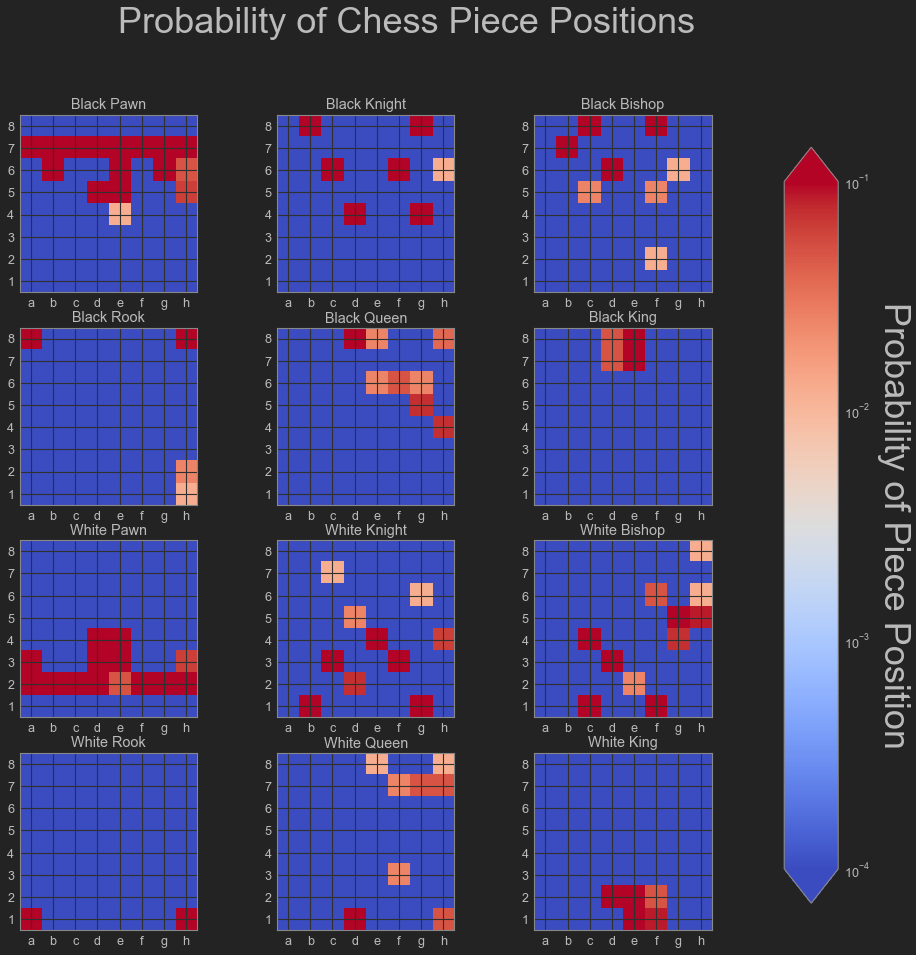

In [488]:
title_lookup = {'p': 'Pawn', 'n': 'Knight', 'b': 'Bishop', 'r': 'Rook', 'q': 'Queen', 'k': 'King'}


file_tick = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
rank_tick = range(8,0,-1)

norm = colors.LogNorm(vmin=1e-4, vmax=1e-1) 
cmap = copy.copy(matplotlib.cm.get_cmap('coolwarm'))
cmap.set_bad(cmap(0))

fig, ax = plt.subplots(4,3)
fig.set_figheight(15)
fig.set_figwidth(15)

iter = 0
for key in piece_lookup:
    this_ax = ax[np.unravel_index(iter, (4,3))]
    iter = iter+1
    
    color = 'Black' if (key.islower()) else 'White'
    
    title = color + ' ' + title_lookup[key.lower()]
    
    to_show = positionprob[:,piece_lookup[key]].reshape(8,8)

    im = this_ax.imshow(to_show, cmap=cmap, norm=norm)
    this_ax.set_xticks(np.arange(len(file_tick)))
    this_ax.set_yticks(np.arange(len(rank_tick)))
    this_ax.set_xticklabels(file_tick)
    this_ax.set_yticklabels(rank_tick)
    
    this_ax.set_title(title)

    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])

cbar = fig.colorbar(im, cax=cbar_ax, extend='both')
cbar.set_label('Probability of Piece Position', rotation=270, fontsize=36, labelpad=40)
cbar.minorticks_on()

fig.suptitle('Probability of Chess Piece Positions', fontsize=36)

plt.show()